In [134]:
from sys import audit

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, MaxPooling2D, UpSampling2D, Reshape, Flatten
from tensorflow.keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Autoencoders para compressão de imagens

## Autoencoder linear

## Carregamento da base de dados

- Dataset: https://keras.io/api/datasets/mnist/

In [60]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [61]:
X_treinamento.shape, y_treinamento.shape

((60000, 28, 28), (60000,))

In [62]:
X_teste.shape, y_teste.shape

((10000, 28, 28), (10000,))

In [63]:
X_treinamento[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [64]:
y_treinamento[0]

np.uint8(5)

## Visualização das imagens

In [65]:
np.random.randint(0, 60000)

15742

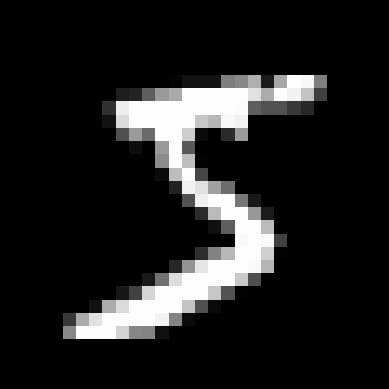

In [66]:
plt.imshow(X_treinamento[0], cmap='gray')
plt.axis('off')
plt.show()

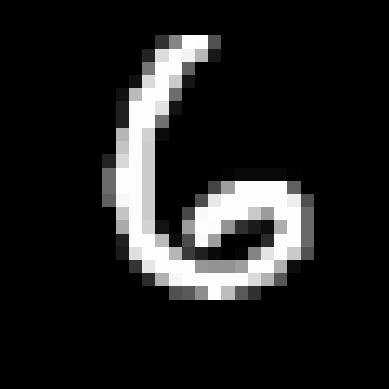

In [67]:
i = np.random.randint(0, 60000)
plt.imshow(X_treinamento[i], cmap='gray')
plt.axis('off')
plt.show()

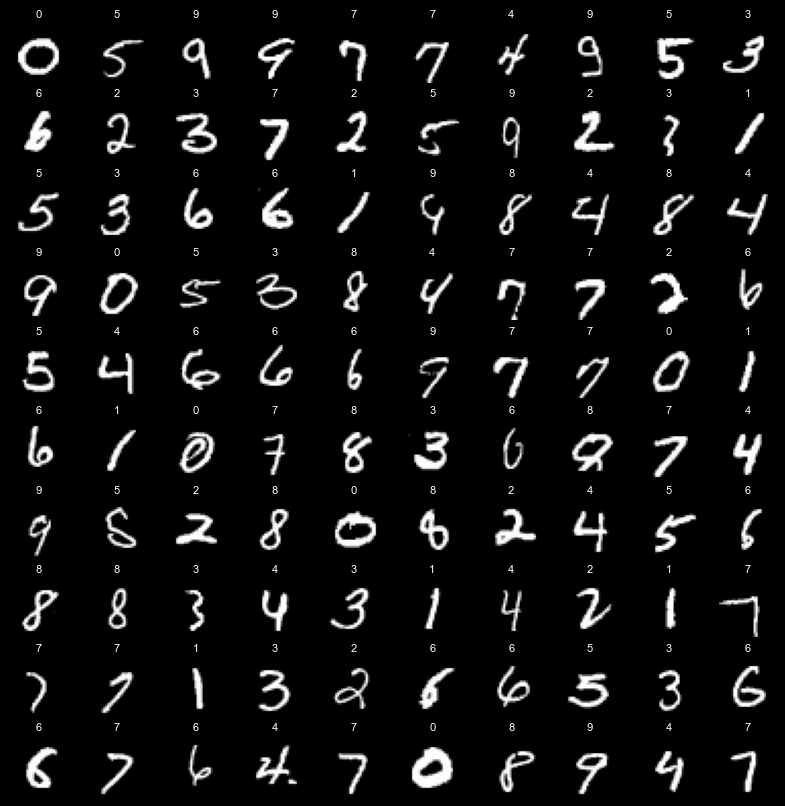

In [68]:
largura = 10
altura = 10
figura, axes = plt.subplots(altura, largura, figsize=(largura, altura))
# print(axes.shape)
axes = axes.ravel()  # (10, 10) -> (100)
# print(axes.shape)
for i in np.arange(0, 100):
    indice = np.random.randint(0, 60000)
    axes[i].imshow(X_treinamento[indice], cmap='gray')
    axes[i].set_title(y_treinamento[indice], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## Pré-processamento das imagens

In [69]:
X_treinamento[0].min(), X_treinamento[0].max()

(np.uint8(0), np.uint8(255))

In [70]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [71]:
X_treinamento[0].min(), X_treinamento[0].max()

(np.float64(0.0), np.float64(1.0))

In [72]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [73]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], X_treinamento.shape[1] * X_treinamento.shape[2])
X_treinamento.shape

(60000, 784)

In [74]:
X_teste = X_teste.reshape(X_teste.shape[0], X_teste.shape[1] * X_teste.shape[2])
X_teste.shape

(10000, 784)

## Construção e treianemtno do autoencoder linear

In [79]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784
autoencoder = Sequential([
    # Codificação
    Input(shape=(784,)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),  # Imagem codificada
    # Decodificação
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=784, activation='sigmoid'),
])

autoencoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
autoencoder.fit(X_treinamento, X_treinamento, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0108 - loss: 0.1540
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0113 - loss: 0.1114
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0125 - loss: 0.1029
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0134 - loss: 0.0978
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0137 - loss: 0.0946
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0141 - loss: 0.0924
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0147 - loss: 0.0905
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0146 - loss: 0.0891
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0149 - loss: 0.0881
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0157 - loss: 0.0872
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0159 - loss: 0.0864
Epoch 12/50
1875/1875 ━━━━━━━━

## Codificação das imagens

In [96]:
autoencoder.get_layer('dense_12').input

<KerasTensor shape=(None, 784), dtype=float32, sparse=False, ragged=False, name=keras_tensor_29>

In [93]:
autoencoder.get_layer('dense_14').output

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_32>

In [95]:
encoder = Model(inputs=autoencoder.get_layer('dense_12').input, outputs=autoencoder.get_layer('dense_14').output)

In [97]:
encoder.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

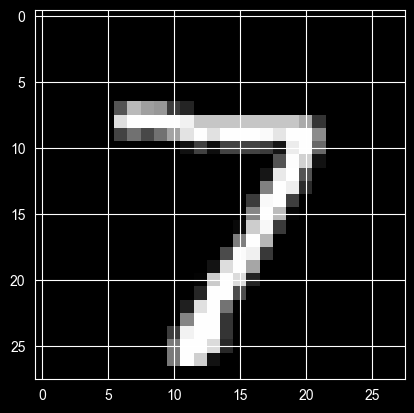

In [100]:
plt.imshow(X_teste[0].reshape(28, 28), cmap='gray');

In [103]:
X_teste[0].shape

(784,)

In [104]:
X_teste[0].reshape(1, -1).shape

(1, 784)

In [106]:
imagem_codificada = encoder.predict(X_teste[0].reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [107]:
imagem_codificada

array([[ 1.321068 ,  6.2844462,  4.734437 ,  5.5026083,  2.4832277,
         0.       , 10.766853 ,  7.857702 ,  3.653075 ,  3.4029698,
         0.       ,  4.163939 ,  3.5173275,  8.092477 ,  7.4809227,
         1.9946038,  6.828744 ,  6.3331876,  7.2158117,  5.143901 ,
         2.4772077,  6.6804085,  3.8433857,  4.1021943,  6.5093136,
         0.       ,  7.40429  ,  2.6993105,  3.0962963,  2.9613922,
         0.       ,  4.7302523]], dtype=float32)

In [108]:
imagem_codificada.shape

(1, 32)

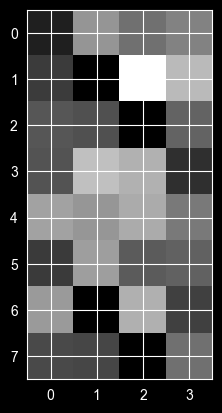

In [113]:
plt.imshow(imagem_codificada.reshape(8, 4), cmap='gray');

## Decodificação das imagens

In [114]:
autoencoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

In [115]:
input_layer_decoder = Input(shape=(32,))
decoder_layer_1 = autoencoder.get_layer('dense_15')
decoder_layer_2 = autoencoder.get_layer('dense_16')
decoder_layer_3 = autoencoder.get_layer('dense_17')
decoder = Model(inputs=input_layer_decoder,
                outputs=decoder_layer_3(decoder_layer_2(decoder_layer_1(input_layer_decoder))))

In [116]:
decoder.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
imagem_decodificada = decoder.predict(imagem_codificada)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [118]:
imagem_decodificada.shape

(1, 784)

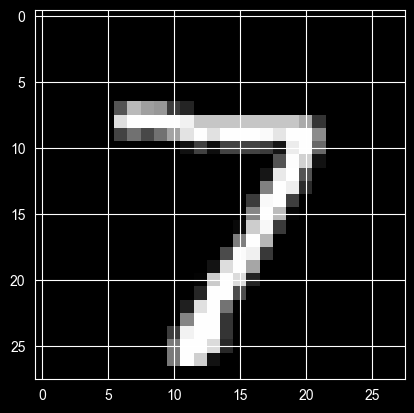

In [120]:
plt.imshow(X_teste[0].reshape(28, 28), cmap='gray');

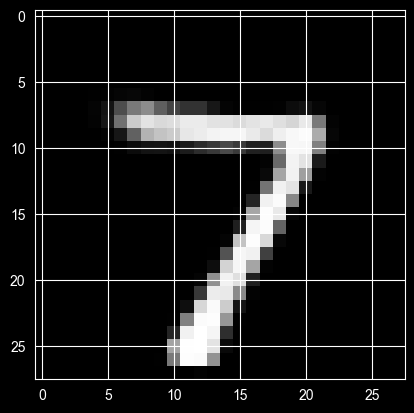

In [121]:
plt.imshow(imagem_decodificada.reshape(28, 28), cmap='gray');

## Codificação e decodificação das imagens de teste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


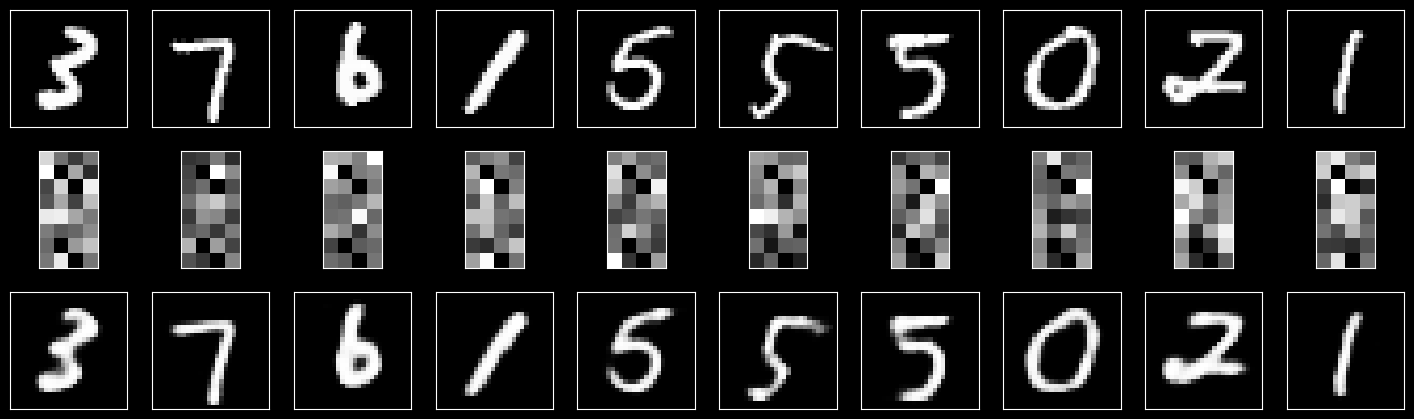

In [122]:
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size=numero_imagens)
#print(imagens_teste)
plt.figure(figsize=(18, 18))
for i, imagem_indice in enumerate(imagens_teste):
    #print(i, imagem_indice)

    # Imagens originais
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(X_teste[imagem_indice].reshape(28, 28), cmap='gray')
    plt.xticks(())
    plt.yticks(())

    # Imagens codificadas
    ax = plt.subplot(10, 10, i + 1 + numero_imagens)
    imagem_codificada = encoder.predict(X_teste[imagem_indice].reshape(1, -1))
    plt.imshow(imagem_codificada.reshape(8, 4), cmap='gray')
    plt.xticks(())
    plt.yticks(())

    # Imagens decodificadas
    ax = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
    plt.imshow(decoder.predict(imagem_codificada).reshape(28, 28), cmap='gray')
    plt.xticks(())
    plt.yticks(())

## Autoencoder convolucional

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [126]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = fashion_mnist.load_data()

In [127]:
X_treinamento.shape, y_teste.shape

((60000, 28, 28), (10000,))

In [128]:
X_teste.shape, y_teste.shape

((10000, 28, 28), (10000,))

## Visualização das imagens

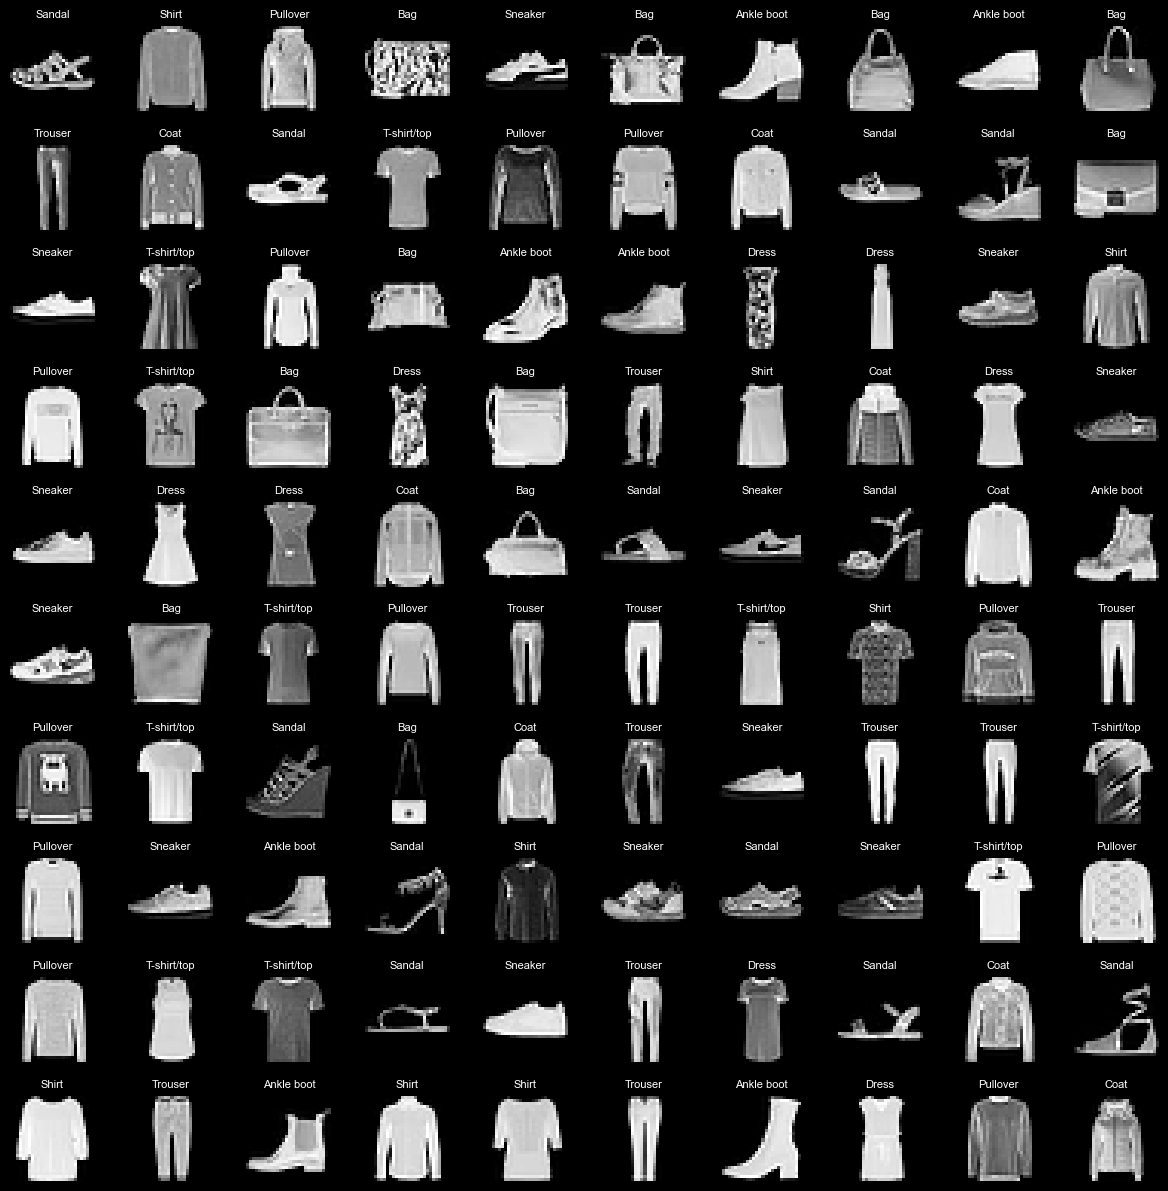

In [129]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
largura = 10
altura = 10
fig, axes = plt.subplots(altura, largura, figsize=(15, 15))
axes = axes.ravel()
for i in np.arange(0, largura * altura):
    indice = np.random.randint(0, 60000)
    axes[i].imshow(X_treinamento[indice], cmap='gray')
    axes[i].set_title(classes[y_treinamento[indice]], fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## Pré-processamento das imagens

In [130]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [131]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [132]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), 28, 28, 1))
X_teste = X_teste.reshape((len(X_teste), 28, 28, 1))

In [133]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Construção e treinamento do autoencoder convolucional

In [146]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow
autoencoder = Sequential()
autoencoder.add(Input(shape=(28, 28, 1)))

# Encoder
autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='valid'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2)))

autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

#autoencoder.summary()

autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same', strides=(2, 2)))

autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder
autoencoder.add(Reshape((4, 4, 8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2, 2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2, 2)))

autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2, 2)))

autoencoder.add(Conv2D(filters=1, kernel_size=(3, 3), activation='relu', padding='same'))
autoencoder.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_10 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_12 (UpSampling2D) │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [148]:
autoencoder.fit(X_treinamento, X_treinamento, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5008 - loss: 0.3500
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5019 - loss: 0.3322
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5012 - loss: 0.3346
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5003 - loss: 0.3399
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5023 - loss: 0.3215
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5025 - loss: 0.3163
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5028 - loss: 0.3192
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5026 - loss: 0.3175
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5015 - loss: 0.3241
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5025 - loss: 0.3183
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5029 - loss: 0.3188
Epoch 12/50
1875/1875 ━━━━━━━

## Codificação e decodificação das imagens de teste

In [149]:
autoencoder.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_10 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_12 (UpSampling2D) │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,157 (51.40 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,772 (34.27 KB)

In [152]:
autoencoder.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_195>

In [153]:
autoencoder.get_layer('flatten_8').output

<KerasTensor shape=(None, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_216>

In [155]:
encoder = Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.get_layer('flatten_8').output)

encoder.summary()

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 13, 13, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
imagens_teste_codificadas = encoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [157]:
imagens_teste_codificadas.shape

(10000, 128)

In [158]:
imagens_teste_codificadas[0]

array([0.08981588, 0.        , 0.19841236, 0.12968192, 0.        ,
       0.05915547, 0.04243771, 0.13110939, 0.1232646 , 0.        ,
       0.22055286, 0.03603773, 0.        , 0.14741018, 0.06824412,
       0.07232311, 0.08139569, 0.        , 0.1557011 , 0.        ,
       0.        , 0.20736742, 0.19709997, 0.0263904 , 0.        ,
       0.        , 0.1440362 , 0.17396933, 0.        , 0.0938076 ,
       0.14511149, 0.12371638, 0.12379792, 0.        , 0.22017653,
       0.        , 0.        , 0.20677978, 0.1777894 , 0.04424626,
       0.20763668, 0.        , 0.17729022, 0.04388165, 0.        ,
       0.14853457, 0.21202299, 0.23062992, 0.34753183, 0.        ,
       0.72949094, 0.20862634, 0.05246554, 0.21204337, 0.        ,
       0.3542244 , 0.01695244, 0.        , 0.67532146, 0.13533899,
       0.2004936 , 0.14951466, 0.        , 0.17681316, 0.38052875,
       0.        , 0.7002486 , 0.3398677 , 0.        , 0.20527399,
       0.        , 0.33264115, 0.19330966, 0.        , 0.97650

In [159]:
imagens_teste_decodificadas = autoencoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [160]:
imagens_teste_decodificadas.shape

(10000, 28, 28, 1)

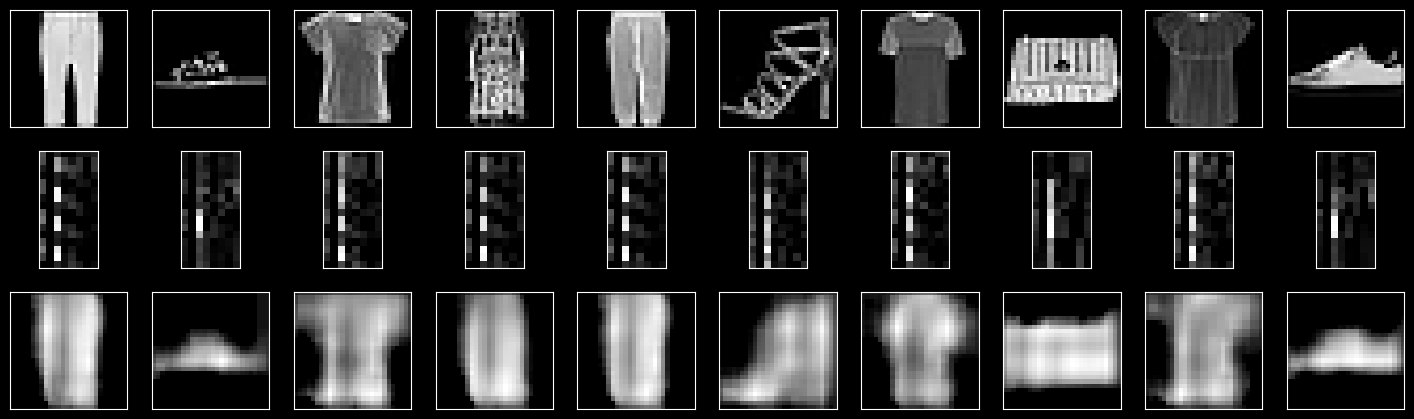

In [161]:
numero_imagens = 10
imagens_teste = np.random.randint(0, 10000, size = numero_imagens)
plt.figure(figsize=(18,18))
for i, imagem_indice in enumerate(imagens_teste):
  # Imagem original
  ax = plt.subplot(10,10, i+1)
  plt.imshow(X_teste[imagem_indice].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens codificadas
  ax = plt.subplot(10,10, i+1+numero_imagens)
  plt.imshow(imagens_teste_codificadas[imagem_indice].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Imagens decodificadas
  ax = plt.subplot(10,10, i+1+numero_imagens*2)
  plt.imshow(imagens_teste_decodificadas[imagem_indice].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())